# 언어판별

In [1]:
# 모듈 불러오기
import os

## 데이터 명세
* Given
  * 영어, 프랑스어, 인도네시아어, 타갈로그어로 된 글이 주어짐
  * 국가명을 알 수 있는 글로 된 학습 데이터 20개 / 테스트 데이터 8개
  * 파일 이름은 "국가명(두 단어)"-"데이터번호".txt 형태
* Goal
  * 새로운 글이 주어지면 어느 국가의 언어로 쓰인 글인지 판별
* 머신러닝 분류
  * 관측한 데이터(글)가 어느 집합(영어, 프랑스어, 인도네시아어, 타갈로그어)에 속하는지 알고 있음 -> 지도학습
  * 어느 범주에 속하는지 **분류**
  * 즉, 지도학습 -> 분류 문제
  * 풀이 방법: 의사결정 나무, 서포트벡터머신

## 파일 리스트 만들기

* 파일을 읽어올 경로를 정해줌
* os.listdir(path)
  * path 위치에 있는 디렉토리의 요소를 모두 반환
  * 요소의 순서는 정해지지 않음
  * 단, '.'과 '..'는 제외

In [2]:
# 학습 데이터와 테스트 데이터 글은 각각의 파일에 쓰여있음
# 파일을 하나하나 불러오기 귀찮으니 파일 리스트를 불러올 생각
# 파일 위치를 정해줌
train_path = '../data/lang/train'
test_path = '../data/lang/test'

In [3]:
# 학습 데이터 위치의 파일 리스트
# 파일 리스트 잘 불러오나 확인
os.listdir(train_path)

['tl-20.txt',
 'en-5.txt',
 'en-4.txt',
 '.DS_Store',
 'en-1.txt',
 'en-3.txt',
 'fr-8.txt',
 'tl-18.txt',
 'fr-10.txt',
 'tl-19.txt',
 'fr-9.txt',
 'en-2.txt',
 'id-15.txt',
 'id-14.txt',
 'id-13.txt',
 'id-12.txt',
 'id-11.txt',
 'fr-7.txt',
 'tl-17.txt',
 'tl-16.txt',
 'fr-6.txt']

* 우리 관심은 확장자가 txt로 된 파일

In [4]:
# 학습 데이터 파일 이름 넣어둘 리스트
train_files = []

# os.listdir 은 순서가 보장 안됨
# 그래서 sorted 로 파일 이름을 순서대로 불러오도록 함
for e in sorted(os.listdir(train_path)):
    # 파일 이름에 txt가 들어있다면 (텍스트 파일이라면) 파일 이름 리스트에 넣음
    if 'txt' in e:
        train_files.append(e)

print(train_files)

['en-1.txt', 'en-2.txt', 'en-3.txt', 'en-4.txt', 'en-5.txt', 'fr-10.txt', 'fr-6.txt', 'fr-7.txt', 'fr-8.txt', 'fr-9.txt', 'id-11.txt', 'id-12.txt', 'id-13.txt', 'id-14.txt', 'id-15.txt', 'tl-16.txt', 'tl-17.txt', 'tl-18.txt', 'tl-19.txt', 'tl-20.txt']


* 테스트 데이터도 학습 데이터와 동일한 방법으로 파일 리스트를 만듦

In [5]:
test_files = []

for e in os.listdir(test_path):
    if 'txt' in e:
        test_files.append(e)
        
print(test_files)

['tl-8.txt', 'en-1.txt', 'en-2.txt', 'fr-4.txt', 'id-5.txt', 'id-6.txt', 'fr-3.txt', 'tl-7.txt']


## 파일 읽기
* 앞서 만든 파일 리스트로부터 파일을 읽어옴
* 연습으로 하나만 읽어오기

In [6]:
# 파일 내용을 읽기 위해서 경로가 잘 나타나는지 확인
print(train_path, train_files[0])

../data/lang/train en-1.txt


* os.path.join(path, \*path)
  * 인자로 넣은 문자들로 이루어진 디렉토리와 파일 경로를 만들어 줌
  * OS에 따라서 경로에 슬래시가 쓰이거나 백슬래시를 사용
  * 현재 프로그램이 돌아가는 OS에 맞추어 알맞은 경로를 만들어줌
* open() 에서 옵션을 그냥 'r'로 주었을 때, 인코딩 에러 발생
  * 해결법: open() 함수에서 encoding 인자에 utf8 줌 -> open(..., encoding='utf8')

In [7]:
# os.path.join() 써보기
print(os.path.join(train_path, train_files[0]))

../data/lang/train/en-1.txt


In [8]:
# 정석으로 쓰려면 요소 하나하나 모두 나누어주어야 함
print(os.path.join('..', 'data', 'lang', 'train', train_files[0]))

../data/lang/train/en-1.txt


In [9]:
# 그냥 읽어오면 에러 발생 (에러는 윈도우에서만 발생)
# 파일을 작성할 때 (인코딩) 방식과 읽어올 때 (디코딩) 방식이 달라서 생기는 문제
with open(os.path.join(train_path, train_files[0]),'r') as f:
    lines = f.readlines()

In [10]:
# 파일 읽기 옵션에 'rb'로 바이트 단위로 읽어와서 살펴보면
# 문자열 가장 앞에 b가 붙어있음
with open(os.path.join(train_path, train_files[0]),'rb') as f:
    lines = f.readlines()

type(lines[0]), lines[:10]

(bytes,
 [b'\n',
  b'\n',
  b'\n',
  b'\n',
  b'The main Henry Ford Museum building houses some of the classrooms for the Henry Ford Academy\n',
  b'\n',
  b'\n',
  b'Henry Ford Academy is the first charter school in the United States to be developed jointly by a global corporation, public education, and a major nonprofit cultural institution. The school is sponsored by the Ford Motor Company, Wayne County Regional Educational Service Agency and The Henry Ford Museum and admits high school students. It is located in Dearborn, Michigan on the campus of the Henry Ford museum. Enrollment is taken from a lottery in the area and totaled 467 in 2010.[1]\n',
  b'Freshman meet inside the main museum building in glass walled classrooms, while older students use a converted carousel building and Pullman cars on a siding of the Greenfield Village railroad. Classes are expected to include use of the museum artifacts, a tradition of the original Village Schools. When the Museum was established in 1

* 해결법 1: 읽어올 때 utf8로 인코딩 하기 (cp949 방법으로 쓴 글을 utf8로 읽어오기)
* 한글로 쓴 글을 영어로 번역 후 읽어오는 것처럼 생각

In [11]:
# encoding 옵션을 추가
with open(os.path.join(train_path, train_files[0]),'r', encoding='utf8') as f:
    lines = f.readlines()

In [12]:
# 읽어온 파일 10줄만 출력해보기
lines[:10]

['\n',
 '\n',
 '\n',
 '\n',
 'The main Henry Ford Museum building houses some of the classrooms for the Henry Ford Academy\n',
 '\n',
 '\n',
 'Henry Ford Academy is the first charter school in the United States to be developed jointly by a global corporation, public education, and a major nonprofit cultural institution. The school is sponsored by the Ford Motor Company, Wayne County Regional Educational Service Agency and The Henry Ford Museum and admits high school students. It is located in Dearborn, Michigan on the campus of the Henry Ford museum. Enrollment is taken from a lottery in the area and totaled 467 in 2010.[1]\n',
 'Freshman meet inside the main museum building in glass walled classrooms, while older students use a converted carousel building and Pullman cars on a siding of the Greenfield Village railroad. Classes are expected to include use of the museum artifacts, a tradition of the original Village Schools. When the Museum was established in 1929, it included a school 

* 해결법 2: 'rb' 옵션으로 읽어온 후 utf8로 디코드
* 일단 읽고 나중에 번역하는 것으로 생각할 수 있음

In [13]:
# rb옵션
with open(os.path.join(train_path, train_files[0]),'rb') as f:
    lines = f.readlines()
    
# 10줄만 디코딩 해보기
for i in range(10):
    print(lines[i].decode('utf8'))









The main Henry Ford Museum building houses some of the classrooms for the Henry Ford Academy





Henry Ford Academy is the first charter school in the United States to be developed jointly by a global corporation, public education, and a major nonprofit cultural institution. The school is sponsored by the Ford Motor Company, Wayne County Regional Educational Service Agency and The Henry Ford Museum and admits high school students. It is located in Dearborn, Michigan on the campus of the Henry Ford museum. Enrollment is taken from a lottery in the area and totaled 467 in 2010.[1]

Freshman meet inside the main museum building in glass walled classrooms, while older students use a converted carousel building and Pullman cars on a siding of the Greenfield Village railroad. Classes are expected to include use of the museum artifacts, a tradition of the original Village Schools. When the Museum was established in 1929, it included a school which served grades kindergarten to colleg

* 한 줄씩 디코딩 하기 귀찮으면 읽을 때 옵션에 encoding='utf8'주기

## 오늘의 머신러닝 과정
* 언어 판별에 앞서
  * 동일한 종류의 알파벳(a-z)을 사용하더라도, 언어마다 문자의 출현 빈도가 다름
  * 출현 빈도에 따라 어느 국가 언어로 쓰인 글인지 판별이 가능
* 머신러닝 과정
  * 데이터 수집
    * 이미 되어 있음
  * 데이터 전처리 & 특징 추출
    * 파일 읽어오는 함수 만들기
    * 읽어온 파일 내용을 알파벳만으로 전처리 (data cleansing)
    * 정말 언어마다 알파벳 출현 빈도가 다른지, 알파벳 출현 빈도 히스토그램 그려보기(matplotlib 익힘)
    * 학습할 모델에 적절한 형태로 입력(출현 빈도 벡터)과 출력(국가)을 분리
  * 모델학습
    * 사이킷런에서 제공하는 분류 모델 중에 적용
  * 모델평가
    * 학습한 모델에 테스트 데이터를 넣어 모델 평가

### 파일 읽어오는 함수 만들기
* 함수의 입력과 출력이 무엇이 되어야 하나 먼저 생각
* 파일 종류(학습/테스트)와 파일리스트 인덱스를 주면 글과 국가명을 반환하도록 만들기
* 즉,
  * 입력
    * 학습 / 테스트 디렉토리 경로
    * 각각의 파일 리스트 인덱스
  * 출력
    * 글
    * 국가

In [14]:
def get_file(filepath, filename):
    """
    args:
        데이터 디렉토리, 데이터 파일 이름
    return:
        파일에서 읽은 모든 문장을 한 문자열로 반환
    """
    fullpath = os.path.join(filepath, filename)
    with open(fullpath, 'r', encoding='utf8') as f:
        lines = f.readlines()
    
    temp = str()
    for line in lines:
        temp += line
        
    return temp, filename[:2]

* 만든 함수를 확인 해보기

In [15]:
words, country = get_file(train_path, train_files[6])

In [16]:
words[:200]

" Vous lisez un «\xa0bon article\xa0».\n\n\n\n\n\nPalais de Westminster, l'abbaye de Westminster et l'église Sainte-Marguerite\xa0*\n\n\n\n\n\n\nPatrimoine mondial de l'UNESCO\n\n\n\n\n\n\n\n\n\n\nLe palais de Westminster vu depuis le"

In [17]:
country

'fr'

## 읽어온 파일 내용을 알파벳만으로 전처리 (data cleansing)
* 앞서 읽어온 데이터에서 알파벳 외의 줄넘김 문자나 숫자 등이 섞여 있음
* 정규표현식을 사용하여 읽어온 내용을 알파벳만으로 전처리
* 정규표현식이란?
  * 특정 규칙을 따르는 문자열 집합을 다루는 데 사용하는 방법
  * 문자열 검색과 치환에 사용함

In [18]:
# 정규표현식 모듈 불러오기
import re

In [19]:
# l 이 두번 들어 있기 때문에 l이 두 개 담긴 리스트가 반환
re.findall("[l]", "hello")

['l', 'l']

In [20]:
# ^은 not으로 규칙 반대
re.findall("[^l]", "hello")

['h', 'e', 'o']

In [21]:
# 대괄호가 없으면 완벽히 맞아떨어지는 단어 찾음
re.findall("dog", "cats and dogs")

['dog']

In [22]:
# 대괄호 안의 문자는 순서 따지지 않고 하나하나 찾음을 주의
re.findall("[dog]", "LA dodgers")

['d', 'o', 'd', 'g']

In [23]:
# 우리 문제에서는 알파벳만 찾으면 되므로 아래 규칙을 사용
print(re.findall("[a-zA-Z]", 'A regular expression (shortened as regex or regexp;[1] also referred to as rational expression)[2][3] is a sequence of characters that define a search pattern. Usually such patterns are used by string searching algorithms for "find" or "find and replace" operations on strings, or for input validation. It is a technique developed in theoretical computer science and formal language theory.'))

['A', 'r', 'e', 'g', 'u', 'l', 'a', 'r', 'e', 'x', 'p', 'r', 'e', 's', 's', 'i', 'o', 'n', 's', 'h', 'o', 'r', 't', 'e', 'n', 'e', 'd', 'a', 's', 'r', 'e', 'g', 'e', 'x', 'o', 'r', 'r', 'e', 'g', 'e', 'x', 'p', 'a', 'l', 's', 'o', 'r', 'e', 'f', 'e', 'r', 'r', 'e', 'd', 't', 'o', 'a', 's', 'r', 'a', 't', 'i', 'o', 'n', 'a', 'l', 'e', 'x', 'p', 'r', 'e', 's', 's', 'i', 'o', 'n', 'i', 's', 'a', 's', 'e', 'q', 'u', 'e', 'n', 'c', 'e', 'o', 'f', 'c', 'h', 'a', 'r', 'a', 'c', 't', 'e', 'r', 's', 't', 'h', 'a', 't', 'd', 'e', 'f', 'i', 'n', 'e', 'a', 's', 'e', 'a', 'r', 'c', 'h', 'p', 'a', 't', 't', 'e', 'r', 'n', 'U', 's', 'u', 'a', 'l', 'l', 'y', 's', 'u', 'c', 'h', 'p', 'a', 't', 't', 'e', 'r', 'n', 's', 'a', 'r', 'e', 'u', 's', 'e', 'd', 'b', 'y', 's', 't', 'r', 'i', 'n', 'g', 's', 'e', 'a', 'r', 'c', 'h', 'i', 'n', 'g', 'a', 'l', 'g', 'o', 'r', 'i', 't', 'h', 'm', 's', 'f', 'o', 'r', 'f', 'i', 'n', 'd', 'o', 'r', 'f', 'i', 'n', 'd', 'a', 'n', 'd', 'r', 'e', 'p', 'l', 'a', 'c', 'e', 'o',

In [24]:
def get_frequency(path, file):
    """
    args:
        파일 위치하는 디렉토리, 파일 이름
    return:
        정규화 된 알파벳 문자 출현 빈도 (출현 비율) 딕셔너리
        키: 알파벳
        값: 출현 비율
    """
    words, country = get_file(path, file)

    # words 에는 알파벳 외 다양한 문자가 들어있다는 것을 확인했음
    # 정규식을 써서 알파벳만 찾아옴
    # 모든 알파벳을 소문자로 변환
    alphabet = sorted(re.findall('[a-zA-Z]', words))
    alphabet = [a.lower() for a in alphabet]

    alphabet_frequency = dict()
    
    # 영어 소문자 a는 97부터 시작 -> z는 97+26
    # 포매팅할 때, c로 나타내면 숫자가 문자(또는 이에 매칭되는 기호)로 나타남
    for i in range(97,97+26):
        c = f"{i:c}"
        alphabet_frequency[c] = alphabet.count(c)
    
    # 글의 길이마다 알파벳 최대 개수가 다를 것임
    # 그래서 최대 알파벳 개수로 나누어주어 정규화 해줌
    max_frequency = max(alphabet_frequency.values())
    
    # 키, 밸류로 루프에서 정규화
    for k, v in alphabet_frequency.items():
        alphabet_frequency[k] = v / max_frequency
        
    return alphabet_frequency, country

In [25]:
# 함수 잘 만들어졌나 하나 확인
alphabet_frequency, country = get_frequency(train_path, train_files[7])

In [26]:
print('알파벳 빈도\n', alphabet_frequency,'\n\n국가\n', country)

알파벳 빈도
 {'a': 0.4823529411764706, 'b': 0.08666666666666667, 'c': 0.23490196078431372, 'd': 0.2984313725490196, 'e': 1.0, 'f': 0.06980392156862746, 'g': 0.07019607843137254, 'h': 0.07647058823529412, 'i': 0.47372549019607846, 'j': 0.02, 'k': 0.006666666666666667, 'l': 0.3952941176470588, 'm': 0.2788235294117647, 'n': 0.5058823529411764, 'o': 0.4109803921568628, 'p': 0.20862745098039215, 'q': 0.04392156862745098, 'r': 0.5101960784313726, 's': 0.5196078431372549, 't': 0.4356862745098039, 'u': 0.3376470588235294, 'v': 0.08431372549019608, 'w': 0.017254901960784313, 'x': 0.03294117647058824, 'y': 0.03215686274509804, 'z': 0.000784313725490196} 

국가
 fr


## 정말 언어마다 알파벳 출현 빈도가 다른지, 알파벳 출현 빈도 히스토그램 그려보기(matplotlib 익힘)
* plt.figure(figsize)
  * 그림을 그리고자하는 도화지를 정의함
  * figsize 인자로 도화지의 크기를 정함
* plt.bar(x, y, alpha, label), plt.plot(), plt.scatter()
  * 그래프 그려줌 (막대그래프, 선그래프, 산점도그래프)
  * x축에 들어갈 값과 이에 해당하는 값(y)을 줌
  * alpha: 막대그래프의 투명도 0에 가까우면 투명, 1에 가까우면 불투명
  * label: 막대/선/점의 라벨
* plt.ylim(bottom, top)
  * 그래프의 y축 표현 범위
  * bottom 부터 top 까지
* plt.title(label)
  * label: 그래프의 제목
* plt.legend()
  * 라벨을 화면에 나타냄
* plt.show()
  * 도화지에 그린 그림을 화면에 보여줌
* plt.savefig(fname)
  * 도화지에 그린 그림을 파일로 저장
  * fname: 저장하고자 하는 파일의 이름

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
# 연습으로 하나 그려보기
alphabet_frequency, country = get_frequency(train_path, train_files[0])

# 알파벳에 따른 출현 빈도 (비율)
alphabet_frequency

{'a': 0.7210743801652892,
 'b': 0.12190082644628099,
 'c': 0.43388429752066116,
 'd': 0.4380165289256198,
 'e': 1.0,
 'f': 0.1487603305785124,
 'g': 0.18181818181818182,
 'h': 0.4152892561983471,
 'i': 0.7024793388429752,
 'j': 0.01652892561983471,
 'k': 0.05165289256198347,
 'l': 0.5103305785123967,
 'm': 0.25,
 'n': 0.7355371900826446,
 'o': 0.8512396694214877,
 'p': 0.15702479338842976,
 'q': 0.0,
 'r': 0.737603305785124,
 's': 0.5826446280991735,
 't': 0.7644628099173554,
 'u': 0.24586776859504134,
 'v': 0.09297520661157024,
 'w': 0.13429752066115702,
 'x': 0.006198347107438017,
 'y': 0.19008264462809918,
 'z': 0.004132231404958678}

* matplotlib 사용 예시에 따라 필요한 인자를 넣어보기
* x축에는 알파벳이 나타나야 함
* 그런데 딕셔너리는 키의 순서가 정렬되어 있지 않음
* 따라서, x축에 영어 알파벳 순서대로 나타나는 리스트
* y축에는 이에 대응하는 알파벳 출현 빈도를 매칭하는 리스트

In [29]:
# 영어 알파벳 순서대로 저장한 리스트
ALPHABET = [f"{a:c}" for a in range(97, 97+26)]
ALPHABET

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [30]:
# 알파벳에 대응하는 출현 빈도 매칭된 리스트
freq = [alphabet_frequency.get(a) for a in ALPHABET]
freq

[0.7210743801652892,
 0.12190082644628099,
 0.43388429752066116,
 0.4380165289256198,
 1.0,
 0.1487603305785124,
 0.18181818181818182,
 0.4152892561983471,
 0.7024793388429752,
 0.01652892561983471,
 0.05165289256198347,
 0.5103305785123967,
 0.25,
 0.7355371900826446,
 0.8512396694214877,
 0.15702479338842976,
 0.0,
 0.737603305785124,
 0.5826446280991735,
 0.7644628099173554,
 0.24586776859504134,
 0.09297520661157024,
 0.13429752066115702,
 0.006198347107438017,
 0.19008264462809918,
 0.004132231404958678]

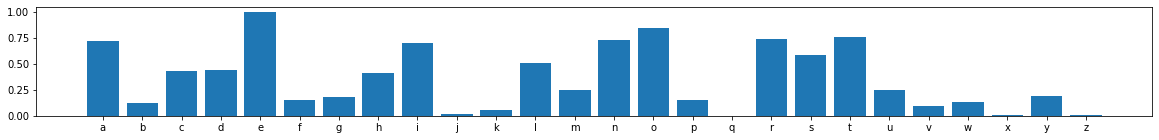

In [31]:
# 그림 그려보기
plt.figure(figsize=(20, 2))
plt.bar(ALPHABET, freq)
plt.show()

## 학습할 모델에 적절한 형태로 입력(출현 빈도 벡터)과 출력(국가)을 분리

* 모든 데이터의 알파벳 빈도와 국가를 리스트에 넣음

In [32]:
X_train = []
y_train = []

for f in train_files:
    freq, country = get_frequency(train_path, f)
    
    # frqeuncy 만 넣기
    X_train.append([freq.get(a) for a in ALPHABET])
    y_train.append(country)

In [33]:
X_test = []
y_test = []

for f in test_files:
    freq, country = get_frequency(test_path, f)
    
    X_test.append([freq.get(a) for a in ALPHABET])
    y_test.append(country)

In [34]:
y_train

['en',
 'en',
 'en',
 'en',
 'en',
 'fr',
 'fr',
 'fr',
 'fr',
 'fr',
 'id',
 'id',
 'id',
 'id',
 'id',
 'tl',
 'tl',
 'tl',
 'tl',
 'tl']

* 위에서 만든 코드를 바탕으로 함수 만들기

In [35]:
def plot_freqs(a, b):
    """
    args:
        X_train 인덱스 범위
    return:
        None
        화면에 알파벳 빈도 그래프 그림
    """
    plt.figure(figsize=(20,2))

    # 영어로 쓰인 글의 알파벳 출현 빈도 다섯개 화면에 나타내기
    for i in range(a, b):
        plt.bar(ALPHABET, X_train[i], alpha=1/(i+1-a))
    
    plt.title(y_train[a])
    plt.ylim(0, 1)
    plt.show()

* 나라마다 데이터가 다섯 개 있으므로 다섯 개씩 끊어서 화면에 뿌려보자.

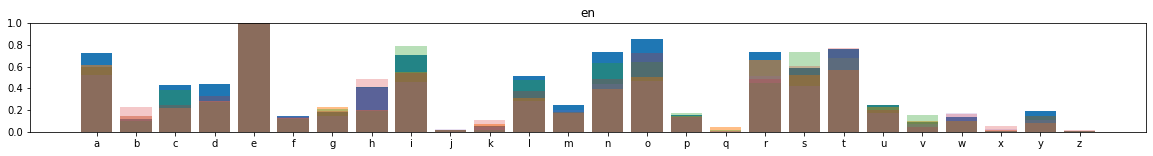

In [36]:
plot_freqs(0, 5)

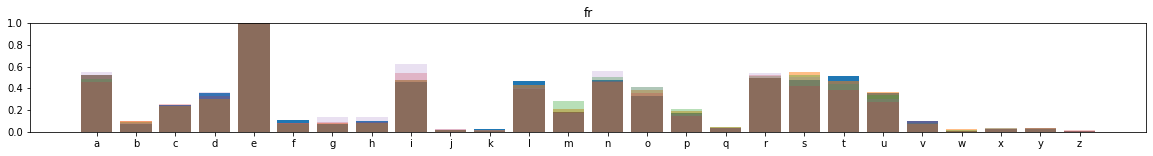

In [37]:
plot_freqs(5, 10)

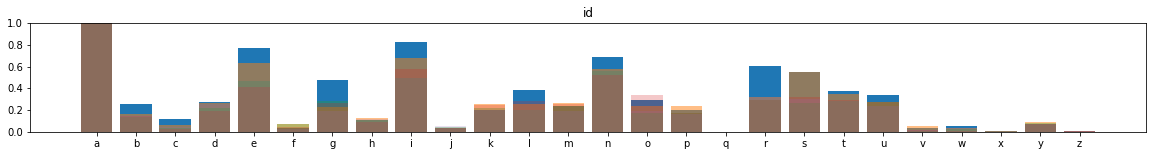

In [38]:
plot_freqs(10, 15)

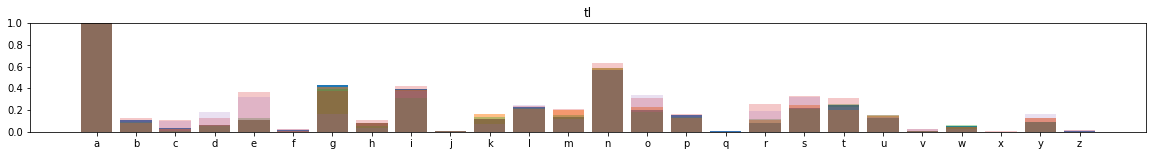

In [39]:
plot_freqs(15, 20)

## 싸이킷런 공통 사용법
싸이킷 런은 항상 이와 같은 구조를 가짐
* 모델.fit(X, y)
  * X를 넣었을 때 y라는 결과가 나오도록 학습
* 모델.predict(X), 모델.transform(X)
  * 학습된 모델에 X를 넣었을 때 값을 예측(predict;분류, 회귀)하거나 변환(transform)

위 두 가지 공통 사용법만 머리에 담고 사용하면 쉬움

## 차원 축소
* 이 데이터는 입력 값이 26차원(알파벳 개수)인 고차원 데이터
* 먼저 2차원 공간에 차원 축소를 이용해 나타내보기
* 축소기.fit(X, y)
  * y로 구분이 되도록 X를 차원축소하는 축소기를 학습시킴
* 축소기.transform(X)
  * 학습시킨 축소기로 X를 차원 축소 (또는 변환transform)
* 축소기.fit_transform(X, y)
  * 축소기를 학습시키면서 변환

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [41]:
# 2차원 공간에 나타내기
lda = LDA(n_components=2)

In [42]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [43]:
X_2d = lda.transform(X_train)

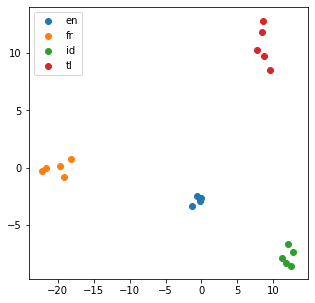

In [44]:
plt.figure(figsize=(5,5))
plt.scatter(X_2d[:5, 0], X_2d[:5, 1], label=y_train[0])
plt.scatter(X_2d[5:10, 0], X_2d[5:10, 1], label=y_train[5])
plt.scatter(X_2d[10:15, 0], X_2d[10:15, 1], label=y_train[10])
plt.scatter(X_2d[15:20, 0], X_2d[15:20, 1], label=y_train[15])
plt.legend()
plt.show()

## 차원 축소한 데이터를 모델에 학습하기

위에서 익힌 모델 공통 사용법과 동일
* 모델.fit(X, y)
  * X를 넣었을 때 y라는 결과가 나오도록 학습
* 모델.predict(X), 모델.transform(X)
  * 학습된 모델에 X를 넣었을 때 값을 예측(predict;분류, 회귀)하거나 변환(transform)

In [45]:
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [46]:
# 영어로 된 국가 명을 숫자로 바꾸어줌
# 이 작업은 아래에서 그래프로 그림을 그리기 위해서 하는 것일 뿐
# 레이블 인코더 클래스 생성
le = LabelEncoder()

# 레이블 인코더를 학습(fit)시켜서 바로 변환(transform)
y_digit = le.fit_transform(y_train)
y_digit

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

In [70]:
# 리니어 서포트 벡터 머신 클래스 생성
# 이 모델은 선형 분리되는 모델 분류에 적합함
# 산점도 그래프로 데이터들이 명확히 나누어지는 것을 확인 함
linear_svc = LinearSVC(random_state=0, max_iter=1e5)

In [71]:
# 모델을 학습 시킴
linear_svc.fit(X_2d, y_digit)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100000.0,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [49]:
# 학습한 모델로 예측
y_pred = linear_svc.predict(X_2d)

In [50]:
# 이 셀의 코드는 무시하기 바랍니다.
# 모델의 학습 결과를 그려보기
x = np.linspace(min(X_2d[:,0])-1e-0, max(X_2d[:,0])+1e-0, 100)
y = np.linspace(min(X_2d[:,1])-1e-0, max(X_2d[:,1])+1e-0, 100)

xx, yy = np.meshgrid(x, y)
xy = list(zip(xx.flatten(), yy.flatten()))
zz = linear_svc.predict(xy).reshape(xx.shape)

In [51]:
# 이 셀의 코드는 무시하기 바랍니다.
zz.shape

(100, 100)

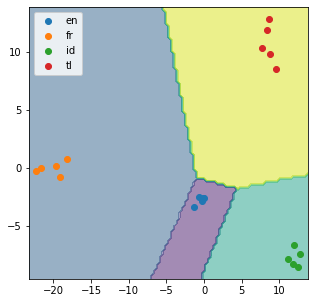

In [52]:
# 이 셀의 코드는 무시하기 바랍니다.
# 아래 그래프만 보세요.
plt.figure(figsize=(5,5))
plt.contourf(xx,yy,zz, alpha=.5)
plt.scatter(X_2d[:5, 0], X_2d[:5, 1], label=y_train[0])
plt.scatter(X_2d[5:10, 0], X_2d[5:10, 1], label=y_train[5])
plt.scatter(X_2d[10:15, 0], X_2d[10:15, 1], label=y_train[10])
plt.scatter(X_2d[15:20, 0], X_2d[15:20, 1], label=y_train[15])
plt.legend()
plt.show()

* 테스트 데이터에 대해 적용해보기

In [53]:
# 학습 데이터로 데이터 차원 축소기를 만들어둠
# 학습한 차원 축소기에 테스트 데이터를 넣어서 차원 축소 실행
X_2d_test = lda.fit_transform(X_test, lda.predict(X_test))

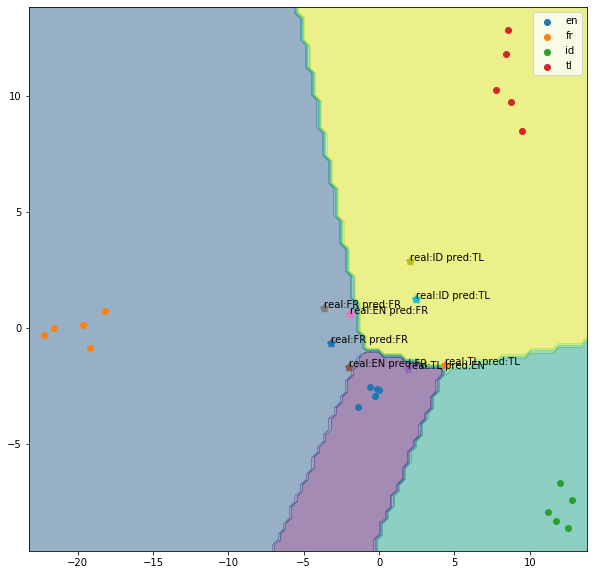

In [54]:
# 이 셀의 코드는 무시하기 바랍니다.
# 아래 그래프만 보세요.
# 차원 축소기로 2차원으로 옮긴 데이터를 리니어 서포트벡터 머신에 학습한 결과
plt.figure(figsize=(10,10))

plt.contourf(xx,yy,zz, alpha=.5)

plt.scatter(X_2d[:5, 0], X_2d[:5, 1], label=y_train[0])
plt.scatter(X_2d[5:10, 0], X_2d[5:10, 1], label=y_train[5])
plt.scatter(X_2d[10:15, 0], X_2d[10:15, 1], label=y_train[10])
plt.scatter(X_2d[15:20, 0], X_2d[15:20, 1], label=y_train[15])

for i in range(len(X_2d_test)):
    _x, _y = X_2d_test[i]
    plt.scatter(_x, _y, marker='*', linewidths=3)
    plt.annotate(s='real:'+y_test[i].upper()+' pred:'+le.inverse_transform(linear_svc.predict(X_2d_test[i:i+1]))[0].upper(), xy=(_x,_y))
plt.legend()
plt.show()

In [55]:
# 국가 예측
y_pred = list(le.inverse_transform(linear_svc.predict(X_2d_test)))

# 차원 축소기로 2차원으로 옮긴 데이터를 리니어 서포트벡터 머신에 학습한 결과
print("정답:", y_test)
print("예측:", y_pred)

정답: ['tl', 'en', 'en', 'fr', 'id', 'id', 'fr', 'tl']
예측: ['en', 'fr', 'fr', 'fr', 'tl', 'tl', 'fr', 'tl']


## 모델 평가 방법
* 학습 시킨 모델의 성능 확인 방법
* 공통 사용법
  * 평가방법(실제 데이터, 예측 데이터)
  * 예시
    * accuracy_score(y_test, y_pred)

In [56]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

* 정확도: 맞은 것은 맞게, 틀린 것은 틀리게 분류한 비율
$$
accuracy = {TP + TN \over TP + TN + FP + FN}
$$

In [57]:
acc = accuracy_score(y_test, y_pred)
print(f'정확도: {acc*100:.2f}%')

정확도: 37.50%


* precision과 recall은 검색 시스템의 평가에 주로 사용

* Precision: 찾은 것 중 맞춘 개수. 모델이 틀린 것을 맞다고 예측하지 않는 능력 평가

$$
precision = {relevant \land retrieved \over retrieved}
$$

$$
precision = {TP \over TP + FP}
$$

In [72]:
precision = precision_score(y_test, y_pred, average=None)
precision

array([1., 1., 1., 1.])

* Recall: 모든 것 중 올바르게 찾은 개수. 모델이 맞는 것을 얼마나 찾아냈는지 평가

$$
recall = {relevant \land retrieved \over relevant}
$$

$$
recall = {TP \over TP + FN}
$$

In [59]:
recall = recall_score(y_test, y_pred, average=None)
recall

array([0. , 1. , 0. , 0.5])

* f1 score
$$
f1 score = {2 \cdot precision \cdot recall \over precision + recall}
$$

In [60]:
f1 = f1_score(y_test, y_pred, average=None)
f1

array([0.        , 0.66666667, 0.        , 0.4       ])

## 차원 축소 없이 SVM 에 적용
* RBF 커널 매핑
* 사용법은 동일
* 모델.fit(X, y)
* 모델.predict(X)

In [61]:
# 분류기 생성
svm = SVC()

In [62]:
# 분류기에 데이터 넣어서 학습시킴
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
# 학습 된 분류기로 예측
y_pred = svm.predict(X_test)

In [64]:
print('정답:', y_test)
print('예측:', list(y_pred))

정답: ['tl', 'en', 'en', 'fr', 'id', 'id', 'fr', 'tl']
예측: ['tl', 'en', 'en', 'fr', 'id', 'id', 'fr', 'tl']


In [65]:
acc = accuracy_score(y_test, y_pred)
print(f'정확도: {acc*100:.2f}%')

정확도: 100.00%


In [66]:
precision = precision_score(y_test, y_pred, average=None)
precision

array([1., 1., 1., 1.])

In [67]:
recall = recall_score(y_test, y_pred, average=None)
recall

array([1., 1., 1., 1.])

In [68]:
f1 = f1_score(y_test, y_pred, average=None)
f1

array([1., 1., 1., 1.])